# 텐서플로우를 이용한 분류분석

In [ ]:
import tensorflow as tf    # 구글이 제공하는 인공지능 관련 함수가 제공되는 텐서2.0으로 세팅
import pandas as pd    #행열로 구성되어 있는 데이터베이스 자료를 처리하는 모듈
import matplotlib.pyplot as plt   # 차트제공하는 모듈

In [ ]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/data/titanic.xls')
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## [문제] 사이킷런 Label Encoding을 이용하여 성별을 0, 1로 변경함
![image.png](attachment:image.png)

In [ ]:
## 성별변경
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.sex.astype('category')
df['sex'] = label.fit_transform(df.sex) # f : 0 / m : 1
df.sex[:5]

#df['sex'] = [0 if x =='female' else 1 for x in df['sex']]

0    0
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

## [문제] 데이터 type float64=> float32로 변경 
## [문제]age,sibsp,parch,fare Null값 제거


In [ ]:
# 데이터 타입 변경
list = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'age']
for col in list:
  df[col] = df[col].astype('float32')
  df = df[df[col].notnull()]

In [ ]:
# age,sibsp,parch,fare Null값 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float32
 1   survived   1045 non-null   float32
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float32
 4   age        1045 non-null   float32
 5   sibsp      1045 non-null   float32
 6   parch      1045 non-null   float32
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float32
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float32(7), float64(1), object(6)
memory usage: 93.9+ KB


## x,y 데이터 분할

In [ ]:
y = df['survived'].values  
x = df.values[:, [0,3,4,5,6,8]]  

#x = mushrooms.drop(['class'], axis=1) #axis는 열 드롭, 생략시 행 드롭
#x = mushrooms.drop(['class'], axis=1).values로  numpy형식으로 보내도됨
print(y[:5])   #class를 y값으로
print(x[:5])   #class를 뺀 나머지를 x값으로 잡음. 


[1. 1. 0. 0. 0.]
[[1.0 0.0 29.0 0.0 0.0 211.33749389648438]
 [1.0 1.0 0.916700005531311 1.0 2.0 151.5500030517578]
 [1.0 0.0 2.0 1.0 2.0 151.5500030517578]
 [1.0 1.0 30.0 1.0 2.0 151.5500030517578]
 [1.0 0.0 25.0 1.0 2.0 151.5500030517578]]


(array([618.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

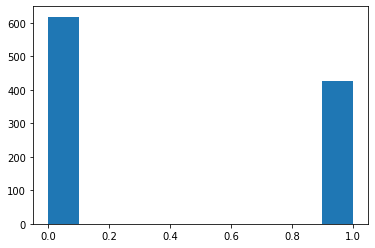

In [ ]:
plt.hist(y)

## 트레이닝 테스트 데이터 나누기

In [ ]:
import numpy as np
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)
x.dtype, y.dtype

(dtype('float32'), dtype('float32'))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)

# 문제_ 모델 제작

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=400, activation="relu", input_shape=(6,)),
                           tf.keras.layers. Dense(units=5, activation="relu"),
                           tf.keras.layers. Dense(units=1, activation="sigmoid") 
]) # 마지만 Dense의 act가 y값이 0, 1 이므로 시그모이드, 원핫이라면 softmax

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mse', metrics=['acc']) # loss?? 이항일때 binary 어쩌구 (mae나 mse 같은거)
              #binary_crossentropy

In [ ]:
model.summary()

#문제 Param의 출력된 갯수를 계산하여 보세요

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               2800      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 2005      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 4,811
Trainable params: 4,811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#다른 신경망 네트워크들과 비슷하게 훈련은 fit메소드를 통해 실행하며, 
# EarlyStopping이라는 callback 함수를 사용하여 val_loss가 3번 이상 연속으로 증가한다면 멈추고 
# 최저의 loss를 사용하도록 선언함

history = model.fit(x_train, y_train, epochs=25, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])
# 지정한 에러율보다 안나오면 멈춘다


Epoch 1/25
20/20 [==============================] - 1s 10ms/step - loss: 0.2618 - acc: 0.5614 - val_loss: 0.2380 - val_acc: 0.5885
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 0.2211 - acc: 0.5981 - val_loss: 0.2374 - val_acc: 0.5885
Epoch 3/25
20/20 [==============================] - 0s 3ms/step - loss: 0.2176 - acc: 0.5981 - val_loss: 0.2361 - val_acc: 0.5885
Epoch 4/25
20/20 [==============================] - 0s 3ms/step - loss: 0.2162 - acc: 0.5981 - val_loss: 0.2358 - val_acc: 0.5885
Epoch 5/25
20/20 [==============================] - 0s 4ms/step - loss: 0.2155 - acc: 0.6715 - val_loss: 0.2358 - val_acc: 0.6507
Epoch 6/25
20/20 [==============================] - 0s 3ms/step - loss: 0.2151 - acc: 0.6874 - val_loss: 0.2357 - val_acc: 0.6555
Epoch 7/25
20/20 [==============================] - 0s 4ms/step - loss: 0.2141 - acc: 0.6906 - val_loss: 0.2347 - val_acc: 0.6651
Epoch 8/25
20/20 [==============================] - 0s 4ms/step - loss: 0.2152 - acc: 0.6

<Figure size 864x288 with 0 Axes>

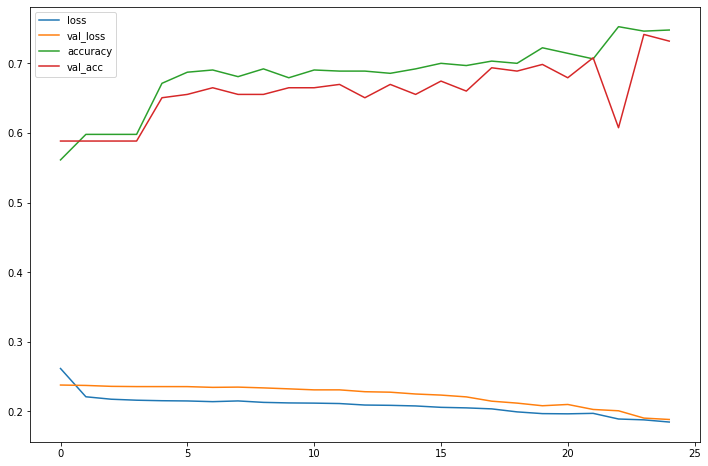

In [ ]:
plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()


In [ ]:
# # 모델 측정
# 손실값, 정확도
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1990 - acc: 0.7368


[0.1990145593881607, 0.7368420958518982]

In [ ]:
np.shape(x_test[0]), np.shape(x_test[0:1]) # 2중 배열로 넣어야한다 x값 넣을떄

((6,), (1, 6))

In [ ]:
# 모델 예측, 아래의 x0~x8의 데이터를 newX값으로 받아서 예측하여 봅니다.
x0_pclass=1
x3_sex=1
x4_age=20
x5_sibsp=3
x6_parch=2
x8_fate=2
newx = [[x0_pclass, x3_sex, x4_age, x5_sibsp, x6_parch, x8_fate]]

model.predict(newx)

array([[0.11931372]], dtype=float32)

In [ ]:
y_pre = []
for pre in model.predict(x_test):
  if pre >=0.5:
    y_pre.append(1)
  else:
    y_pre.append(0)

In [ ]:

# 타이타닉 h5모델로 저장

In [ ]:
model.save('/content/gdrive/MyDrive/data/my_ti.h5')

In [ ]:
load_model = tf.keras.models.load_model('/content/gdrive/MyDrive/data/my_ti.h5')

In [ ]:
load_model.predict(newx)

array([[0.39697707]], dtype=float32)

In [ ]:
y_pre[:10], y_test[:10]

([1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1.], dtype=float32))